<h1 align="center">El problema del camino aleatorio.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

## 1. Cargar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## 2. Distancia recorrida en el problema de camino aleatorio 2D
### 2.1. Método para obtener recorrido y graficar

In [2]:
def camino_aleatorio(p = 0.5, num_pasos=100, dist_paso=0.5, theta=-45, x0=0, y0=0, plot=True, show_label=True, dpi=300, title=''):
    ps = np.random.binomial(1, p, size=num_pasos)
    theta0 = theta * np.pi / 180
    x = [x0]; y = [y0]
    theta = 0
    for p in ps:
        theta += p*theta0 - (1-p)*theta0
        if np.abs(theta) >= 2*np.pi:
            theta -= 2*np.pi if theta > 0 else -2*np.pi
        cos = np.round(np.cos(theta), 3)
        sen = np.round(np.sin(theta), 3)
        x.append(x[-1] + dist_paso*cos)
        y.append(y[-1] + dist_paso*sen)
    r0 = np.r_[x[0], y[0]]
    rl = np.r_[x[-1], y[-1]]
    dr = rl-r0
    recorrido = np.linalg.norm(dr)
    if plot:
        label = r'$|\vec{r}_{fin}-\vec{r}_0|=%0.1f$ [m]' % recorrido
        plt.plot(x, y, ':k', alpha=0.4)
        plt.plot([x[0], x[-1]], [y[0], y[-1]], '-ro', label=label)
        plt.xlabel('x [m]')
        plt.ylabel('y [m]')
        plt.title(title)
        if show_label:
            _ = plt.legend()
    return recorrido

### 2.2. Graficar

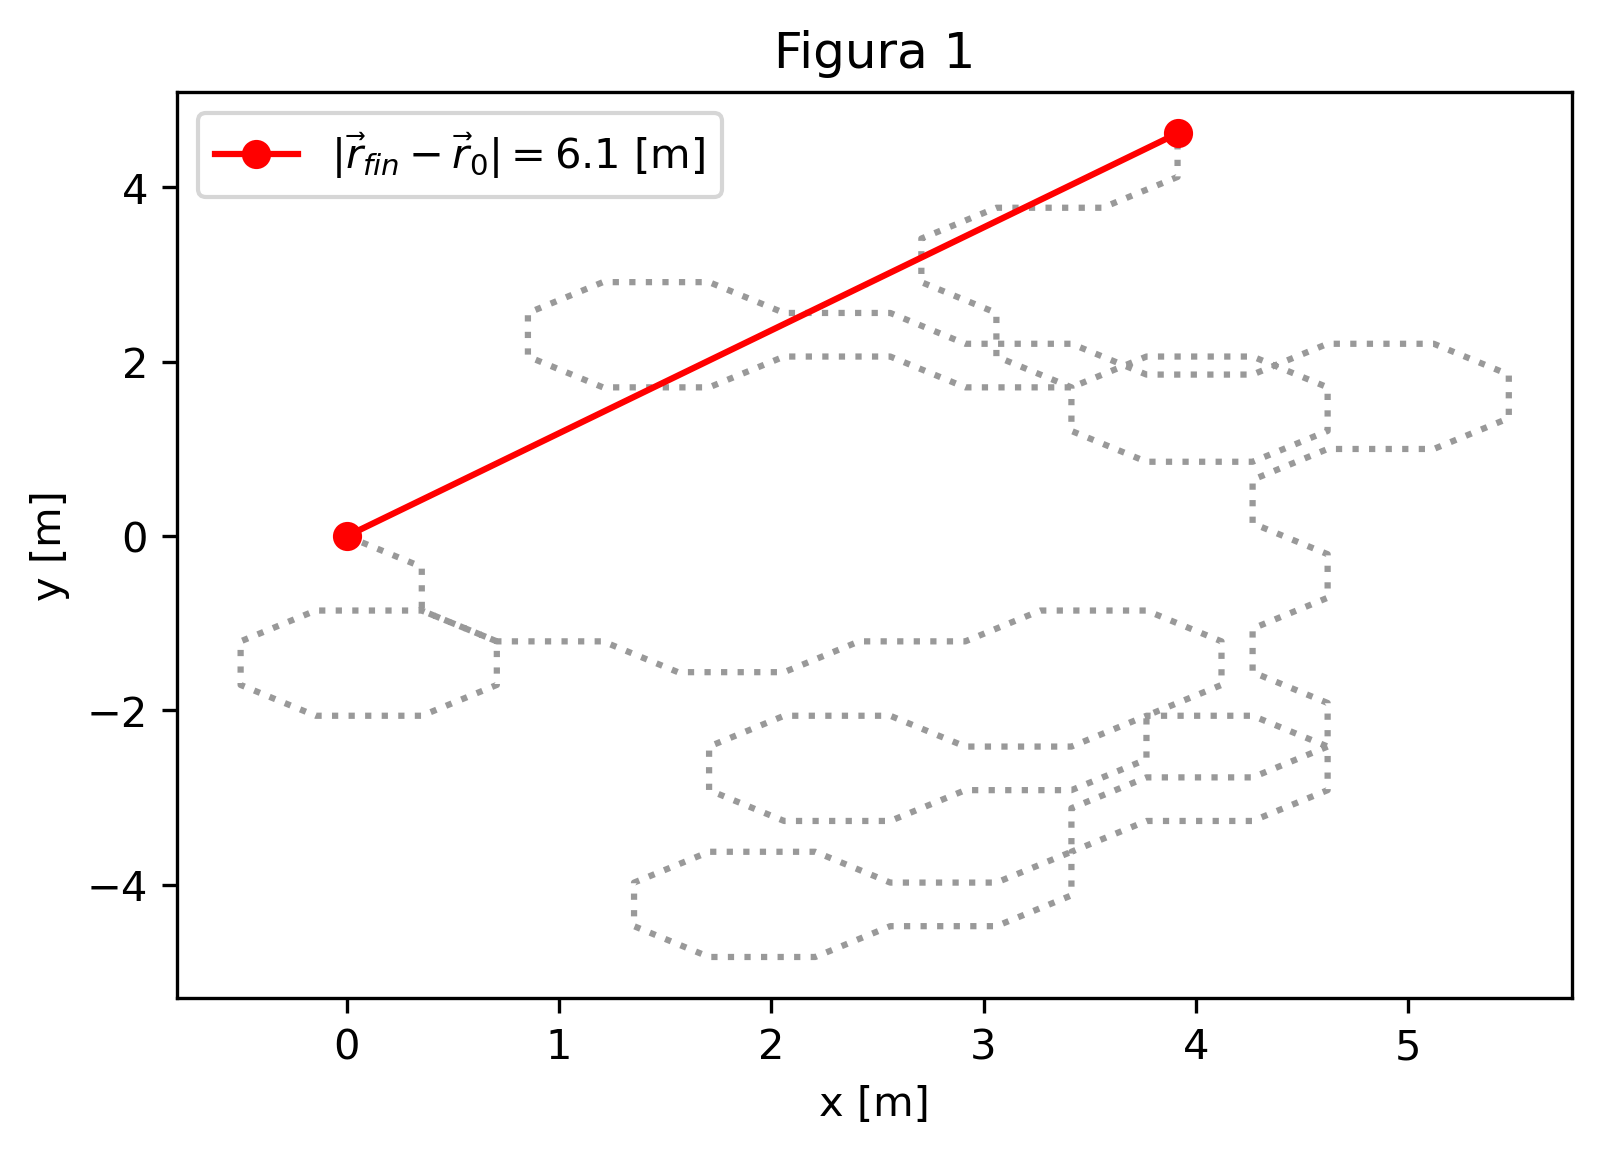

In [3]:
p = 0.5; theta = 45; dpi = 300
plt.figure(dpi=dpi)
_ = camino_aleatorio(p=p, theta=theta, title='Figura 1')

## 3. Ensamble
### 3.1. Obtención del ensamble y los primeros momentos

In [4]:
num_sistemas = 500
ensamble = [camino_aleatorio(p=p, theta=theta, plot=False) for s in range(num_sistemas)]
ensamble_mean = np.mean(ensamble)
ensamble_std  = np.std(ensamble)

### 3.2. Gráfica de un 10% del ensamble

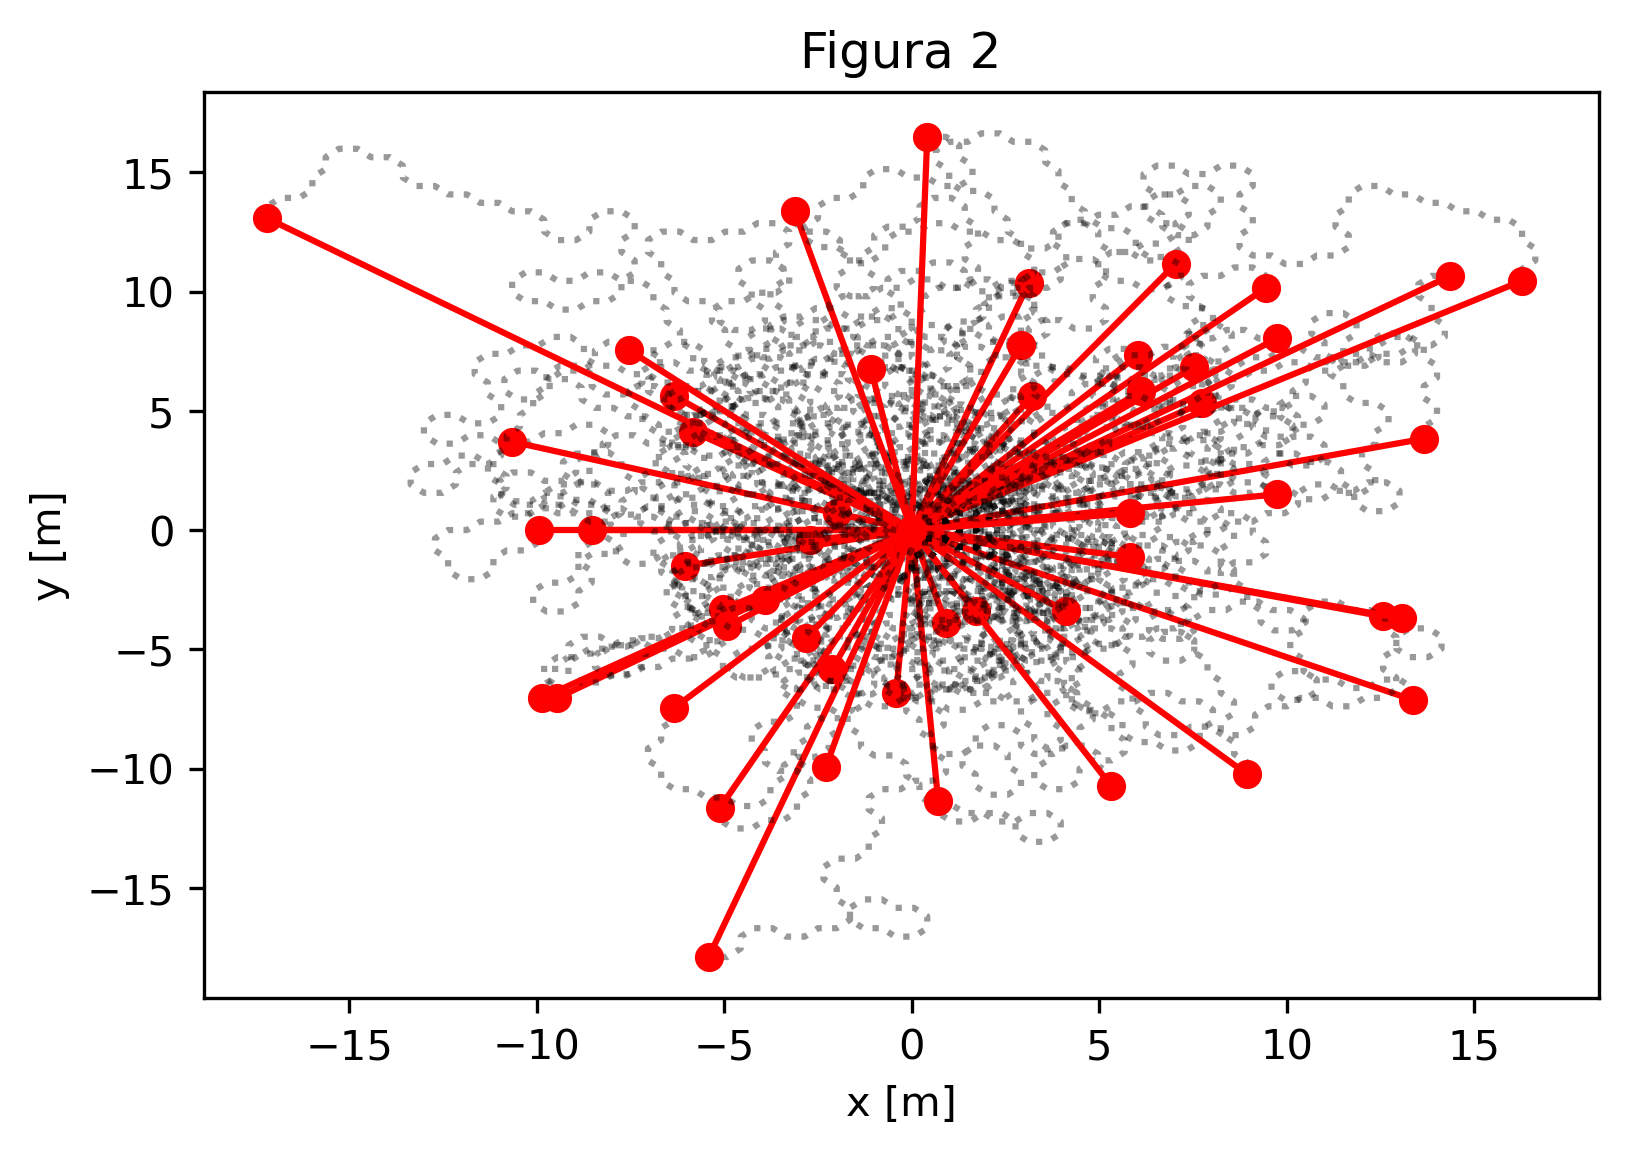

In [5]:
plt.figure(dpi=dpi)
_ = [camino_aleatorio(
        p=p, 
        theta=theta, 
        plot=True, 
        title='Figura 2',
        show_label=False) for s in range(int(num_sistemas/10))]

### 3.3. Gráfica de recorrido para los sistemas del ensamble

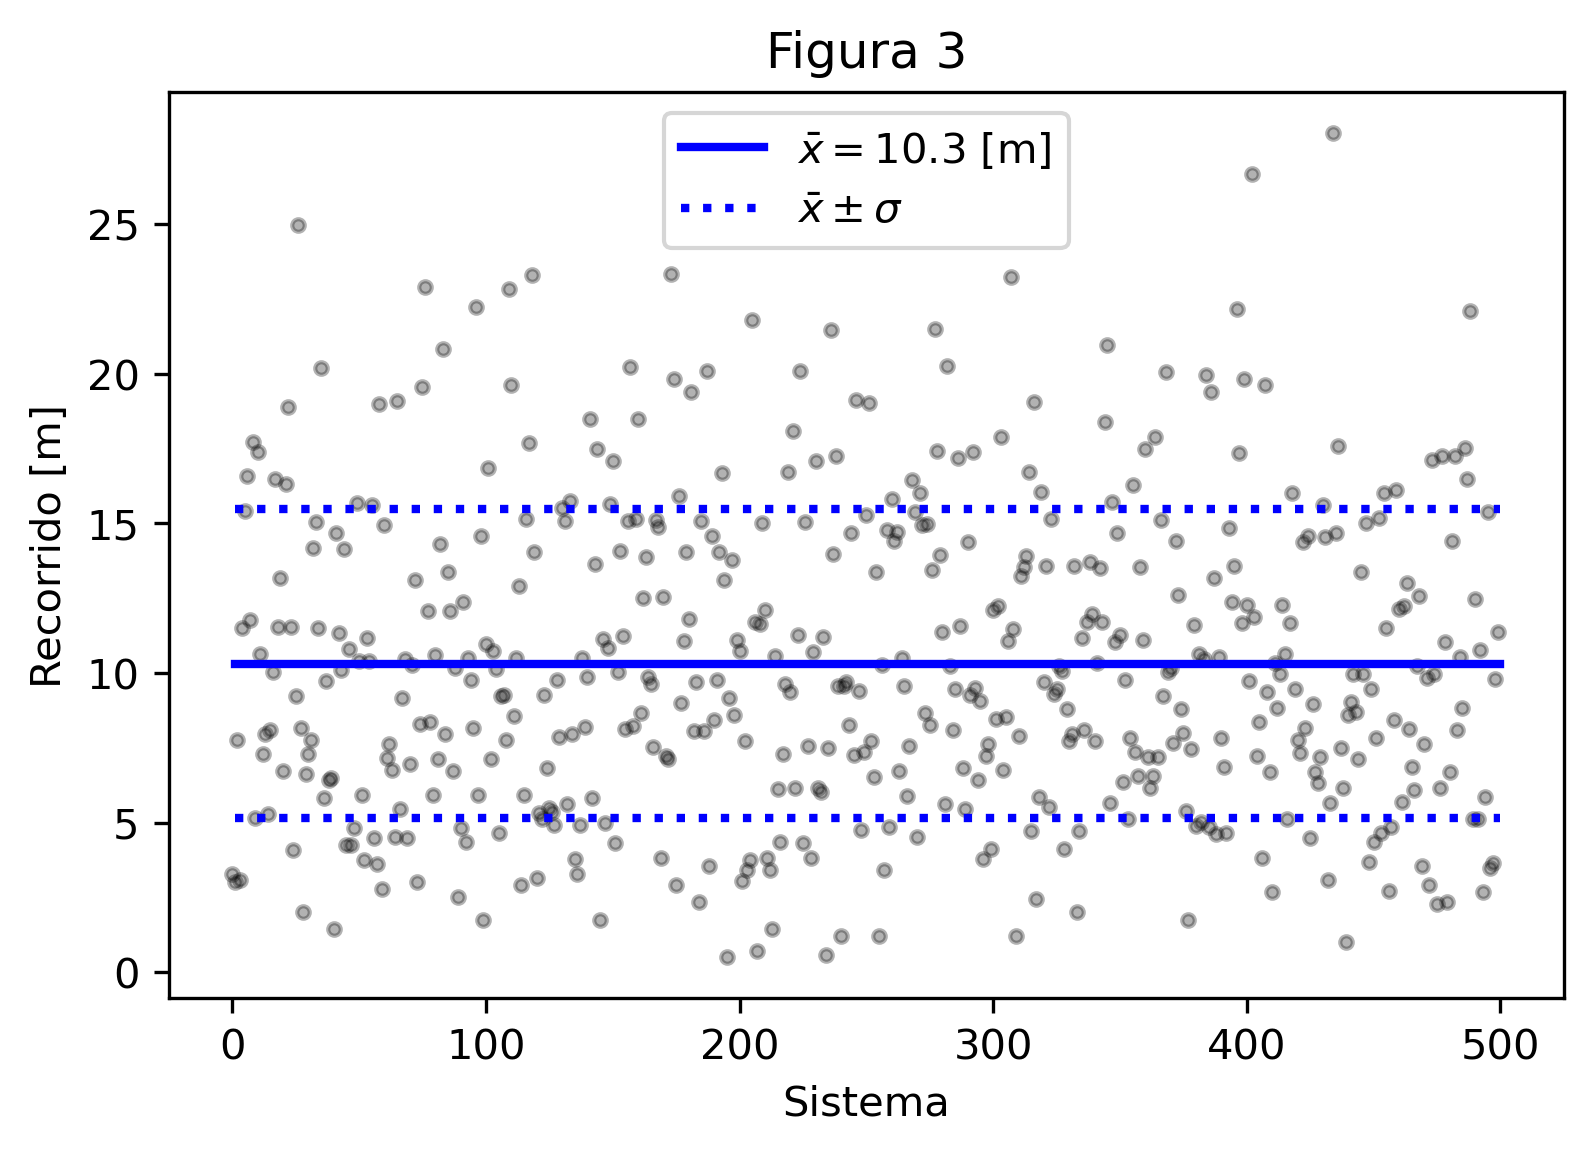

In [6]:
dpi = 300
plt.figure(dpi=dpi)
plt.plot(ensamble, '.k', alpha=0.3)
plt.plot([1, num_sistemas], 2*[ensamble_mean], 
            'b', lw=2, label=r'$\bar{x}=%0.1f$ [m]' % ensamble_mean)
plt.plot([1, num_sistemas], 2*[ensamble_mean-ensamble_std], ':b', label=r'$\bar{x}\pm\sigma$', lw=2)
plt.plot([1, num_sistemas], 2*[ensamble_mean+ensamble_std], ':b', lw=2)
plt.xlabel('Sistema')
plt.ylabel('Recorrido [m]')
plt.title('Figura 3')
_ = plt.legend()

### 3.4. Histograma

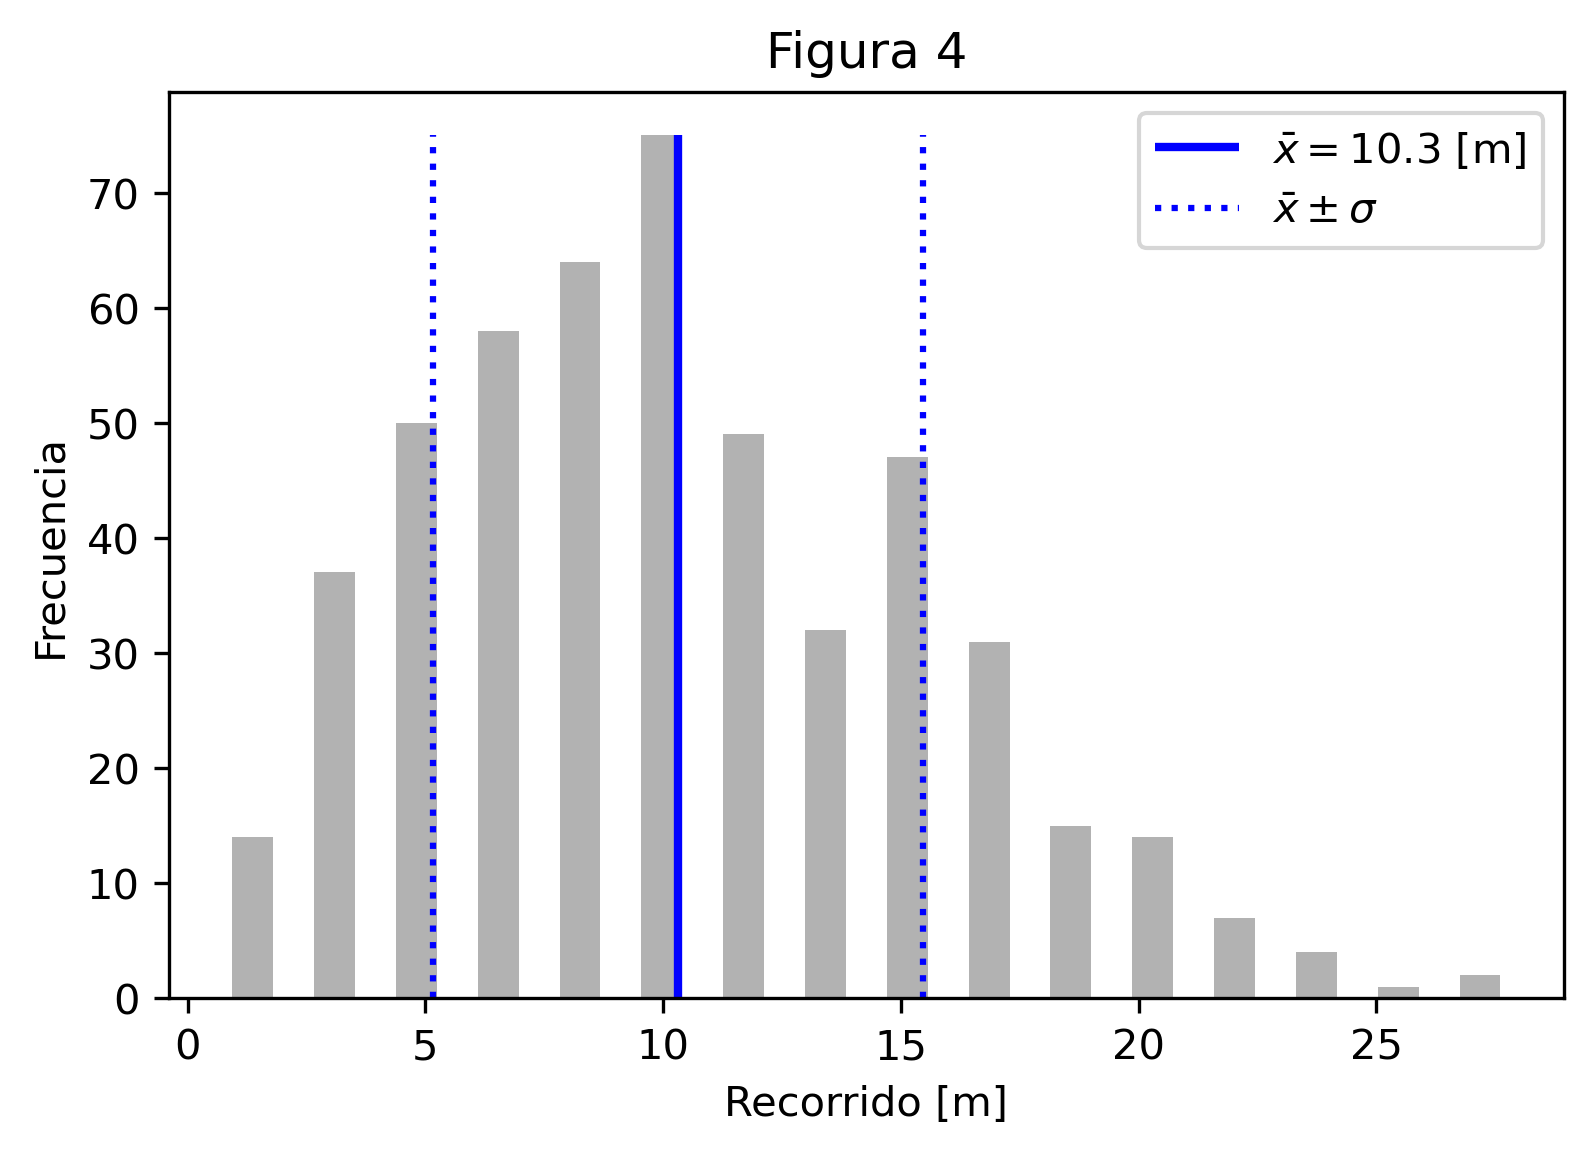

In [7]:

plt.figure(dpi=dpi)
y, x, fig = plt.hist(ensamble, bins=16, density=False, histtype='bar', rwidth=0.5, color='k', alpha=0.3)
plt.vlines(ensamble_mean, 0, max(y), color='b', lw=2, label=r'$\bar{x}=%0.1f$ [m]' % ensamble_mean)
plt.vlines(ensamble_mean+ensamble_std, 0, max(y), ls=':', color='b',label=r'$\bar{x}\pm\sigma$')
plt.vlines(ensamble_mean-ensamble_std, 0, max(y), ls=':', color='b')
plt.xlabel('Recorrido [m]')
plt.ylabel('Frecuencia')
plt.title('Figura 4')
_ = plt.legend()

## 4. Preguntas de autoexplicación

4.1. ¿Cuál es el propósito de definir un ángulo *theta* en el método *camino_aleatorio*?

4.2. Describa por qué varía $|\vec{r}_{fin}-\vec{r}_0|$ cuando se vuelven a ejecutar los comandos del ítem 2.2 sin variar ningún parámetro. 

4.3. En la Figura 1, ¿cuál es el efecto de variar *p*, *theta* y volver a simular?  Explique.

4.4. En el método *camino_aleatorio* (item 2.1) se define *ps* como una variable aleatoria binomial y en el ítem 3.1 se obtiene un ensamble de caminos aleatorios con el método *camino_aleatorio*.  ¿Es la media y momentos de *ps* igual a los de *ensamble*?  Describa cómo se relaciona o diferencia *ps* de *ensamble*.

4.5. Describa cómo se obtiene la Figura 1.

4.6. Describa el efecto observado en la Figura 2 al ejecutar los mismos comandos del ítem 3.2 varias veces sin variar ningún parámetro.

4.7. En la Figura 2, ¿cuál es el efecto de variar *p*, *theta* y volver a simular?  Explique.

4.8. Interprete la Figura 2. Tenga el cuenta la naturaleza aleatoria del fenómeno y la distancia entre la posición final e inicial.

4.9. Describa todos los elementos que aparecen en las Figuras 4 y 5.

End!